In [410]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import scipy.stats as ss
import scipy
from scipy.stats import norm

In [411]:
tick = "SPY"
spy = yf.Ticker(tick)
history = spy.history(period="1y")

In [412]:
da= pd.DataFrame(history)
da.reset_index(inplace=True)

In [413]:
da.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2023-12-28 00:00:00-05:00,470.840398,471.501895,470.228255,470.652802,77158100,0.0,0.0,0.0
1,2023-12-29 00:00:00-05:00,470.455331,470.988501,467.305730,469.290283,122234100,0.0,0.0,0.0
2,2024-01-02 00:00:00-05:00,466.180156,467.671042,464.531293,466.663940,123623700,0.0,0.0,0.0
3,2024-01-03 00:00:00-05:00,464.472089,465.222473,462.240732,462.852875,103585900,0.0,0.0,0.0
4,2024-01-04 00:00:00-05:00,462.369009,464.995324,461.134841,461.361938,84232200,0.0,0.0,0.0


In [414]:
import matplotlib.pyplot as plt
import numpy as np

In [415]:
def vol(da):
  log = np.log(da.Close/da.Open)
  log = log.dropna()
  daily_vol = log.std()
  vol = daily_vol*np.sqrt(len(da))
  return vol

In [416]:
vol=vol(da)

In [417]:
symbol = 'SPY'
df = yf.Ticker(symbol)

In [418]:
df.options

('2024-12-30',
 '2024-12-31',
 '2025-01-02',
 '2025-01-03',
 '2025-01-10',
 '2025-01-17',
 '2025-01-24',
 '2025-01-31',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-04-30',
 '2025-05-16',
 '2025-05-30',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-08-15',
 '2025-09-19',
 '2025-09-30',
 '2025-12-19',
 '2026-01-16',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

In [419]:
exp=df.option_chain(df.options[7])

In [420]:
# df.options[7]

In [421]:
cd=pd.DataFrame(exp.calls)

In [422]:
# cd

In [423]:
cd2=pd.DataFrame(exp.puts)

In [424]:
cd2

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY250131P00340000,2024-12-27 19:23:22+00:00,340.0,0.12,0.09,0.10,0.04,50.000000,68.0,4149,0.676761,False,REGULAR,USD
1,SPY250131P00345000,2024-12-27 18:22:04+00:00,345.0,0.14,0.10,0.11,0.05,55.555553,2.0,134,0.666996,False,REGULAR,USD
2,SPY250131P00350000,2024-12-27 17:17:14+00:00,350.0,0.16,0.11,0.12,0.06,59.999996,2.0,2242,0.657230,False,REGULAR,USD
3,SPY250131P00355000,2024-12-27 15:02:57+00:00,355.0,0.14,0.11,0.12,-0.01,-6.666670,1.0,2111,0.640629,False,REGULAR,USD
4,SPY250131P00360000,2024-12-26 19:27:44+00:00,360.0,0.11,0.12,0.13,0.00,0.000000,4.0,562,0.630863,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,SPY250131P00650000,2024-12-20 16:24:04+00:00,650.0,57.89,54.27,55.50,0.00,0.000000,2.0,0,0.166024,True,REGULAR,USD
193,SPY250131P00655000,2024-12-24 16:42:24+00:00,655.0,55.49,59.27,60.50,0.00,0.000000,4.0,0,0.177498,True,REGULAR,USD
194,SPY250131P00660000,2024-12-24 15:45:20+00:00,660.0,60.75,64.27,65.50,0.00,0.000000,1.0,0,0.188729,True,REGULAR,USD
195,SPY250131P00670000,2024-12-24 16:49:27+00:00,670.0,70.20,74.27,75.50,0.00,0.000000,9.0,0,0.210701,True,REGULAR,USD


In [425]:
def call(S,K,T,r,sigma):
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  price=price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  return price

In [426]:
def put(S,K,T,r,sigma):
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
  return price

In [427]:
date=exp.calls.lastTradeDate[204]
date2=df.options[7]

In [428]:
# print(date)

In [429]:
# print(date2)

In [430]:
date2 = pd.to_datetime(date2, utc=True)
days_left = (date2 - date).days

In [431]:
# days_left

In [432]:
T=days_left/365
p=da['Close'].iloc[-1]
print(p)

595.010009765625


In [433]:
call_prices = {}
for K in exp.calls['strike']:
    call_price = call(p, K=K, T=T, r=0.07*T, sigma=vol)
    call_prices[K] = call_price

In [434]:
df = pd.DataFrame(list(call_prices.items()), columns=['strike', 'call_price'])

In [435]:
df['theo_price']=cd['lastPrice']

In [436]:
df

,strike,call_price,theo_price
0,340.0,2.552165e+02,261.77
1,345.0,2.502195e+02,264.40
2,350.0,2.452225e+02,242.41
3,355.0,2.402256e+02,211.17
4,360.0,2.352286e+02,207.44
...,...,...,...
200,680.0,1.368526e-05,0.04
201,685.0,3.983598e-06,0.02
202,690.0,1.105585e-06,0.03
203,695.0,2.927889e-07,0.03


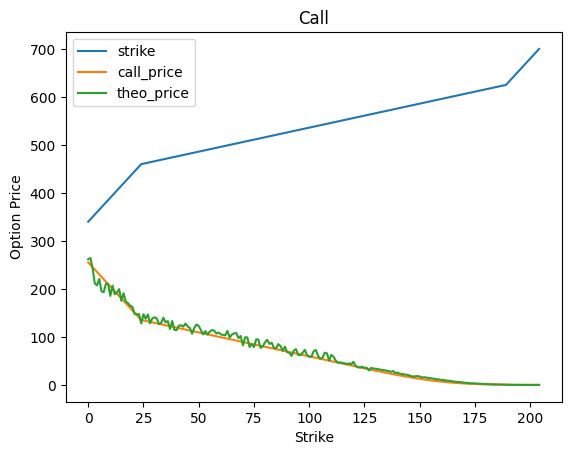

In [437]:
df.plot()
plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('Call')
plt.show()

In [438]:
put_prices = {}
for K in exp.puts['strike']:
    put_price = put(p, K=K, T=T, r=0.07*T, sigma=vol)
    put_prices[K] = put_price

In [439]:
df2= pd.DataFrame(list(put_prices.items()), columns=['strike', 'put_price'])

In [440]:
df2['theo_price']=cd2['lastPrice']

In [441]:
df2['theo_price'] = df2['theo_price'].fillna(0)

In [442]:
df2

,strike,put_price,theo_price
0,340.0,2.313335e-80,0.12
1,345.0,2.466683e-76,0.14
2,350.0,1.816491e-72,0.16
3,355.0,9.367802e-69,0.14
4,360.0,3.428256e-65,0.11
...,...,...,...
192,650.0,5.460323e+01,57.89
193,655.0,5.959539e+01,55.49
194,660.0,6.459040e+01,60.75
195,670.0,7.458330e+01,70.20


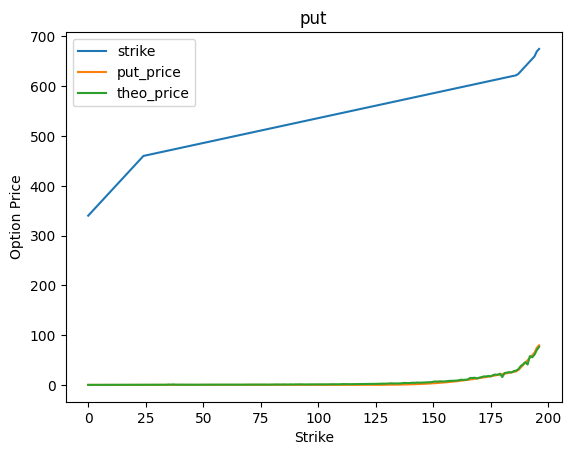

In [443]:
df2.plot()
plt.xlabel('Strike')
plt.ylabel('Option Price')
plt.title('put')
plt.show()

In [444]:
def delta(r,S,K,T,sigma,option):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option == "call":
        return norm.cdf(d1)
    elif option == "put":
        return -norm.cdf(-d1)

In [445]:
def gamma(r, S, K, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

In [446]:
def vega(r, S, K, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

In [447]:
def theta(r, S, K, T, sigma, option):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option == "call":
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif option == "put":
        theta = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
    return theta/365

In [448]:
def rho(r, S, K, T, sigma, option):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option== "call":
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option== "put":
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)

In [449]:
def greeks(strike, S, T, r, sigma, option):
    final_col = []
    for K in strike:
        delta_val = delta(r, S, K, T, sigma,option)
        gamma_val = gamma(r, S, K, T, sigma)
        theta_val = theta(r, S, K, T, sigma,option)
        vega_val = vega(r, S, K, T, sigma)
        rho_val= rho(r, S, K, T, sigma,option)
        final_col.append({'Strike': K,'Delta':delta_val,'Gamma':gamma_val,'Theta':theta_val,'Vega':vega_val,'Rho':rho_val})
    return pd.DataFrame(final_col)

In [450]:
final=greeks(cd['strike'],p,T,0.07*T,vol,"call")

In [451]:
final

,Strike,Delta,Gamma,Theta,Vega,Rho
0,340.0,1.000000e+00,2.694796e-80,-6.070247e-03,8.618284e-77,31.652002
1,345.0,1.000000e+00,2.726843e-76,-6.159515e-03,8.720775e-73,32.117472
2,350.0,1.000000e+00,1.904469e-72,-6.248784e-03,6.090722e-69,32.582943
3,355.0,1.000000e+00,9.308751e-69,-6.338052e-03,2.977051e-65,33.048414
4,360.0,1.000000e+00,3.226591e-65,-6.427320e-03,1.031903e-61,33.513884
...,...,...,...,...,...,...
200,680.0,3.807979e-06,1.012169e-06,-4.656588e-06,3.237038e-03,0.000210
201,685.0,1.160650e-06,3.242049e-07,-1.490918e-06,1.036847e-03,0.000064
202,690.0,3.365799e-07,9.855157e-08,-4.530375e-07,3.151799e-04,0.000019
203,695.0,9.295552e-08,2.846441e-08,-1.308049e-07,9.103264e-05,0.000005
